In [13]:
import os
import kagglehub
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import pandas as pd
import numpy as np

In [14]:
DOWNLOAD_ROOT = "shivamb/disney-movies-and-tv-shows"
DATA_DIR = os.path.join("datasets", "disney_movies_and_tv_shows")

def fetch_data(housing_url=DOWNLOAD_ROOT, housing_path=DATA_DIR):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    downloaded_path = kagglehub.dataset_download(housing_url)

    if os.path.isdir(downloaded_path):
        for file_name in os.listdir(downloaded_path):
            shutil.move(os.path.join(downloaded_path, file_name), housing_path)
    else:
        shutil.move(downloaded_path, housing_path)

    print("Dataset descargado en:", housing_path)

fetch_data()

Dataset descargado en: datasets\disney_movies_and_tv_shows


In [15]:
def load_archive_data(housing_path=DATA_DIR, encoding='utf-8'):
    csv_path = os.path.join(housing_path, "disney_plus_titles.csv")
    return pd.read_csv(csv_path, sep=',', encoding=encoding,index_col=0)

try:
    df = load_archive_data()
except UnicodeDecodeError:
    try:
        df = load_archive_data(encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = load_archive_data(encoding='Windows-1252')

df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [16]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [17]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
print(mf_ratio)

type  Movie  TV Show
type   0.73     0.27


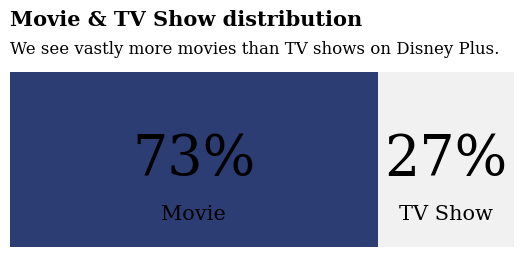

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#142864', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#F0F0F0', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)

for i in mf_ratio.index:
        ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                xy=(mf_ratio['Movie'][i]/2, i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='black')
        ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='black')
                
        ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='black')
        ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='black')


# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Disney Plus.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [19]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['First Country'] = df['country'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,First Country
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,United States
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,United States
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,United States
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",United States
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",United States,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,United States


In [20]:
countries = df['First Country'].value_counts().reset_index()
countries.columns = ['Country', 'Count']
countries.replace('United States', 'USA', inplace=True)
countries.replace('United Kingdom', 'UK', inplace=True)
countries.sort_values('Count', ascending=False, inplace=True)
top_10_countries = countries.iloc[:10]
top_10_countries

,Country,Count
0,USA,1340
1,UK,50
2,Canada,26
3,France,10
4,Australia,4
5,Ireland,3
6,Argentina,3
7,Austria,2
8,India,2
9,China,2


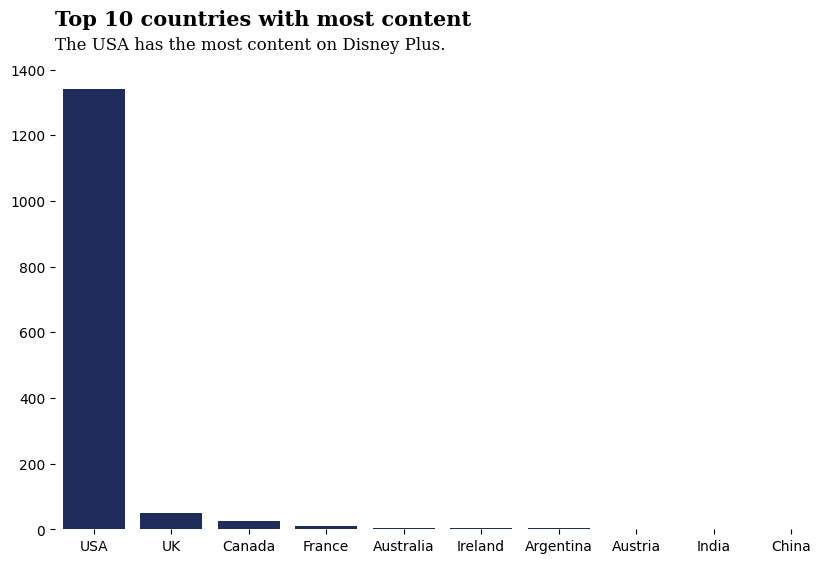

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=top_10_countries, x='Country', y='Count',color='#142864', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
fig.text(0.125,0.95,'Top 10 countries with most content', fontfamily='serif',fontsize=15, fontweight='bold')

fig.text(0.125,0.91,'The USA has the most content on Disney Plus.',fontfamily='serif',fontsize=12)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()

C:\Users\franf\AppData\Local\Temp\ipykernel_10476\476476986.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


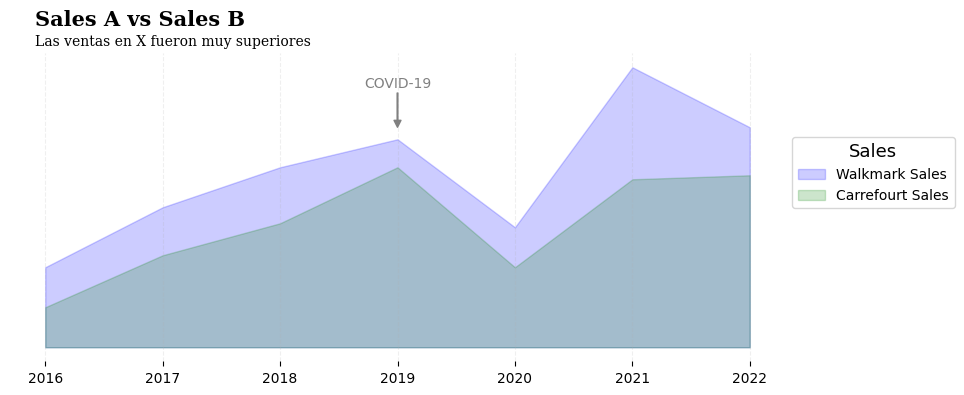

In [22]:
sales_a=[2,3.5,4.5,5.2,3,7,5.5]
sales_b=[1,2.3,3.1,4.5,2,4.2,4.3]
years=[2016,2017,2018,2019,2020,2021,2022]
plt.style.use(
    'default' 
)

fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.fill_between(years,sales_a, color="blue", alpha=0.2,label="Sales A")
ax.fill_between(years,sales_b, color="green", alpha=0.2,label="Sales B")
fig.text(0.15, 0.95, "Sales A vs Sales B", color = "Black",fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.15, 0.90, "Las ventas en X fueron muy superiores ", color = "Black",fontfamily='serif',fontsize=10)

ax.annotate(
    'COVID-19', # El texto
    xy = (2019, 5.5), # La ubicación del punto sobre el cual hare mi anotación (x, y). A este punto apuntara mi flecha
    xytext = (2019, 6.5), # La ubicacion donde estara mi texto
    size=10, 
    color='grey',
    horizontalalignment='center',
    arrowprops={ 
        'width': 0.5,
        'color': 'gray',
        'headwidth': 5,
        'headlength': 5
    }
)


ax.grid(linestyle='--', alpha=0.2)
ax.legend(
    title="Sales",
    labels=['Walkmark Sales', 'Carrefourt Sales'],
    title_fontsize='13',
    loc='upper left',
    bbox_to_anchor=(1, 0.75), # Porcentaje del eje X y Y donde quiero colocar mi leyenda tomando como referencia "loc"
    alignment='center'
)
ax.set_yticks([])

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.show()

C:\Users\franf\AppData\Local\Temp\ipykernel_10476\1663134066.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


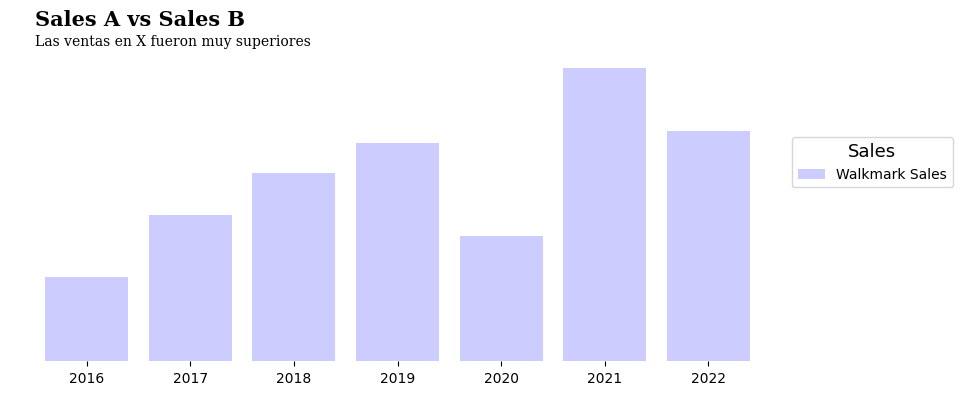

In [25]:
sales_a=[2,3.5,4.5,5.2,3,7,5.5]
years=[2016,2017,2018,2019,2020,2021,2022]
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.bar(years,sales_a, color="blue", alpha=0.2,label="Sales A")
fig.text(0.15, 0.95, "Sales A vs Sales B", color = "Black",fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.15, 0.90, "Las ventas en X fueron muy superiores ", color = "Black",fontfamily='serif',fontsize=10)

ax.legend(
    title="Sales",
    labels=['Walkmark Sales', 'Carrefourt Sales'],
    title_fontsize='13',
    loc='upper left',
    bbox_to_anchor=(1, 0.75), # Porcentaje del eje X y Y donde quiero colocar mi leyenda tomando como referencia "loc"
    alignment='center'
)
ax.set_yticks([])

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.show()

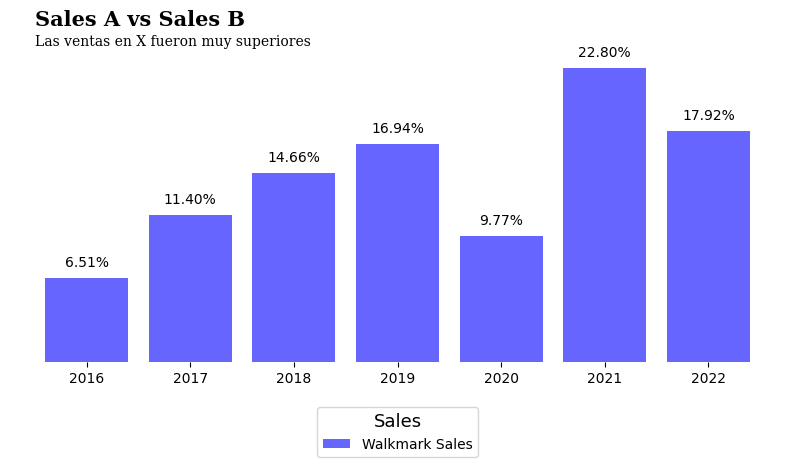

In [54]:
import matplotlib.pyplot as plt

# Datos
sales_a = [2, 3.5, 4.5, 5.2, 3, 7, 5.5]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Crear el gráfico de barras
ax.bar(years, sales_a, color="blue", alpha=0.6, label="Sales A")

# Calcular el total de ventas y los porcentajes
total_sales = sum(sales_a)
percentages = [(sale / total_sales) * 100 for sale in sales_a]

# Agregar el porcentaje encima de cada barra
for i, value in enumerate(sales_a):
    ax.text(years[i], value + 0.2, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Agregar los textos adicionales
fig.text(0.15, 0.95, "Sales A vs Sales B", color="Black", fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.15, 0.90, "Las ventas en X fueron muy superiores", color="Black", fontfamily='serif', fontsize=10)

# Leyenda
ax.legend(
    title="Sales",
    labels=['Walkmark Sales', 'Carrefourt Sales'],
    title_fontsize='13',
    loc='upper center',
    bbox_to_anchor=(0.5, -.125),
    alignment='center'
)

# Ocultar los ejes y bordes
ax.set_yticks([])
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Mostrar la gráfica
plt.show()


In [27]:
sales_a=[2,3.5,4.5,5.2,3,7,5.5]
sales_b=[1,2.3,3.1,4.5,2,4.2,4.3]
years=[2016,2017,2018,2019,2020,2021,2022]

In [29]:
gender = ['M','F']
count = [60,40]

<BarContainer object of 2 artists>

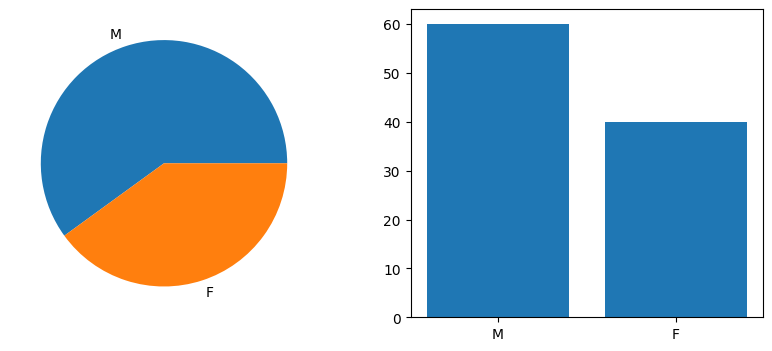

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].pie(count, labels=gender)
ax[1].bar(gender, count)